In [107]:
import pandas as pd
import numpy as np
import re
import sklearn
#import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [2]:
# Find this file at https://opendata.miamidade.gov/311/311-Service-Requests-Miami-Dade-County/dj6j-qg5t
all_data = pd.read_csv('./311_Service_Requests_-_Miami-Dade_County.csv')

In [4]:
print(all_data.columns.values)
all_data.head()

['Ticket ID' 'Issue Type' 'Issue Description' 'Case Owner'
 'Case Owner Description' 'Street Address' 'City' 'State / Province'
 'Zip / Postal Code' 'Neighborhood / District / Ward / etc.'
 'Created Year Month' 'Ticket Created Date / Time'
 'Ticket Last Updated Date / Time' 'Ticket Closed Date / Time'
 'Ticket Status' 'X Coordinate' 'Y Coordinate' 'Latitude' 'Longitude'
 'Location Geo. Coded' 'Method Received' 'Goal Days'
 'Actual Completed Days']


,Ticket ID,Issue Type,Issue Description,Case Owner,Case Owner Description,Street Address,City,State / Province,Zip / Postal Code,Neighborhood / District / Ward / etc.,...,Ticket Closed Date / Time,Ticket Status,X Coordinate,Y Coordinate,Latitude,Longitude,Location Geo. Coded,Method Received,Goal Days,Actual Completed Days
0,13-00000001,ASU POLICE ASSISTANCE,NaN,Animal_Services,Animal Services,7707 SW 117TH AVE,Miami_Dade_County,Florida,33173.0,District 10,...,01/01/2013 12:34:18 AM,CLOSED,859632.259755,495700.415381,25.696061,-80.382117,"7707 SW 117TH AVE\nMIAMI, Florida 33173\n(25.6...",MOBILE,1,0.0
1,13-00000002,ASU POLICE ASSISTANCE,NaN,Animal_Services,Animal Services,18800 NW 57TH AVE,Miami_Dade_County,Florida,33015.0,District 1,...,01/01/2013 01:46:44 AM,CLOSED,888138.472187,585887.469673,25.943794,-80.294085,"18800 NW 57TH AVE\nMIAMI, Florida 33015\n(25.9...",MOBILE,1,0.0
2,13-00000174,CAT TRAP REQUEST,NaN,Animal_Services,Animal Services,7897 SW 12TH ST,Miami_Dade_County,Florida,33144.0,District 10,...,01/10/2014 01:17:19 PM,CLOSED,878585.500000,518636.436000,25.758910,-80.324207,"7897 SW 12TH ST\nMIAMI, Florida 33144\n(25.758...",PHONE,15,374.0
3,13-00000175,PIT BULL INVESTIGATION,NaN,Animal_Services,Animal Services,2985 SW 2ND ST,City_of_Miami,Florida,33135.0,District 5,...,02/13/2013 12:01:38 PM,CLOSED,905190.573399,522934.268098,25.770336,-80.243301,"2985 SW 2ND ST\nMIAMI, Florida 33135\n(25.7703...",PHONE,30,43.0
4,13-00000176,ANIMAL BITE TO A PERSON,NaN,Animal_Services,Animal Services,16630 SW 103RD PL,Miami_Dade_County,Florida,33157.0,District 9,...,01/10/2013 12:41:18 PM,CLOSED,866815.937500,466100.281250,25.614528,-80.360737,"16630 SW 103RD PL\nMIAMI, Florida 33157\n(25.6...",PHONE,14,9.0


In [10]:
# drop_elements = ['TicketID', 'Name', 'Ticket', 'Cabin', 'SibSp']
# train = train.drop(drop_elements, axis = 1)

data_cleaned = all_data.copy()

data_cleaned.info()
data_cleaned.describe()
data_cleaned.describe(include=['O'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1396689 entries, 0 to 1396688
Data columns (total 23 columns):
Ticket ID                                1396689 non-null object
Issue Type                               1396689 non-null object
Issue Description                        0 non-null float64
Case Owner                               1396689 non-null object
Case Owner Description                   1396689 non-null object
Street Address                           1393879 non-null object
City                                     1392409 non-null object
State / Province                         1393129 non-null object
Zip / Postal Code                        1393741 non-null float64
Neighborhood / District / Ward / etc.    1396689 non-null object
Created Year Month                       1396689 non-null int64
Ticket Created Date / Time               1396689 non-null object
Ticket Last Updated Date / Time          1396689 non-null object
Ticket Closed Date / Time                137467

,Ticket ID,Issue Type,Case Owner,Case Owner Description,Street Address,City,State / Province,Neighborhood / District / Ward / etc.,Ticket Created Date / Time,Ticket Last Updated Date / Time,Ticket Closed Date / Time,Ticket Status,Location Geo. Coded,Method Received
count,1396689,1396689,1396689,1396689,1393879,1392409,1393129,1396689,1396689,1396689,1374670,1396689,1396689,1396689
unique,1396689,234,12,12,424239,36,1,14,1206895,847677,557117,13,486772,28
top,15-10124793,BULKY TRASH REQUEST,Waste_Management,Waste_Management,8831 NW 58TH ST,Miami_Dade_County,Florida,District 8,01/10/2013 12:00:00 AM,09/29/2017 01:13:01 AM,06/16/2017 12:00:00 AM,CLOSED,MIAMI\n,PHONE
freq,1,302027,807281,807281,1005,1044365,1393129,205624,339,2184,1608,1367846,1542,1058941


In [92]:
issues_count = data_cleaned.groupby(['Issue Type'])\
    .size()\
    .reset_index(name='counts')\
    .sort_values(['counts'], ascending=False)
    
issues_count.head(20)


,Issue Type,counts
38,BULKY TRASH REQUEST,302027
86,GREEN WASTE CART REQUEST,200430
138,RECYCLING BLUE CART ISSUES,67968
83,GARBAGE COMPLAINT,49910
125,PET ACCOUNT UPDATE,49445
91,ILLEGAL DUMPING - WM,46887
173,STRAY / DOG-AT-LARGE,43432
130,POTHOLE,40342
112,MOSQUITOES CAUSING A BITING NUISANCE,36800
97,JUNK AND TRASH / OVERGROWTH,35604


In [90]:
issues_count.describe()

,counts
count,234.000000
mean,5968.756410
std,25157.048158
min,1.000000
25%,43.250000
50%,317.000000
75%,2344.000000
max,302027.000000


In [94]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1396689 entries, 0 to 1396688
Data columns (total 23 columns):
Ticket ID                                1396689 non-null object
Issue Type                               1396689 non-null object
Issue Description                        0 non-null float64
Case Owner                               1396689 non-null object
Case Owner Description                   1396689 non-null object
Street Address                           1393879 non-null object
City                                     1392409 non-null object
State / Province                         1393129 non-null object
Zip / Postal Code                        1393741 non-null float64
Neighborhood / District / Ward / etc.    1396689 non-null object
Created Year Month                       1396689 non-null int64
Ticket Created Date / Time               1396689 non-null object
Ticket Last Updated Date / Time          1396689 non-null object
Ticket Closed Date / Time                137467

In [128]:
data_cleaned['Ticket Created Date / Time'] = \
    pd.to_datetime(data_cleaned['Ticket Created Date / Time'])

tickets_when = data_cleaned[['Ticket ID', 'Ticket Created Date / Time']]
tickets_when.head()

TypeError: 'numpy.int64' object is not callable

In [162]:
start_time = datetime.date(year=2017, month=9, day=5)
irma_datetime = datetime.date(year=2017, month=9, day=10)
irma_aftertime = datetime.date(year=2017, month=9, day=15)

before_irma = tickets_when[(tickets_when['Ticket Created Date / Time'] > start_time) & \
                           (tickets_when['Ticket Created Date / Time'] < irma_datetime)]

before_irma.shape

(3351, 2)

In [163]:
after_irma = tickets_when[(tickets_when['Ticket Created Date / Time'] > irma_datetime) & \
                           (tickets_when['Ticket Created Date / Time'] < irma_aftertime)]
after_irma.shape


(5399, 2)

In [164]:
before_irma_tix = before_irma['Ticket ID']
after_irma_tix = after_irma['Ticket ID']

before_df = data_cleaned.loc[data_cleaned['Ticket ID'].isin(before_irma_tix)]
after_df = data_cleaned.loc[data_cleaned['Ticket ID'].isin(after_irma_tix)]

In [165]:
before_issues = before_df.groupby(['Issue Type'])\
    .size()\
    .reset_index(name='counts')\
    .sort_values(['counts'], ascending=False)
    
before_issues.head(15)

,Issue Type,counts
14,BULKY TRASH REQUEST,1068
34,ILLEGAL DUMPING - WM,434
39,JUNK AND TRASH / OVERGROWTH,218
32,GARBAGE COMPLAINT,159
26,DRAIN CLOGGED / CLEANING,150
79,UNSAFE PROPERTY / JOB SITE,143
33,GREEN WASTE CART REQUEST,133
75,TREE TRIMMING (RAAM),102
15,BULKY TRASH UPDATE,89
35,ILLEGAL DUMPING / LITTER,86


In [166]:
after_issues = after_df.groupby(['Issue Type'])\
    .size()\
    .reset_index(name='counts')\
    .sort_values(['counts'], ascending=False)
    
after_issues.head(15)

,Issue Type,counts
2,311 ACTIVATION - FPL (POWER LINE DOWN/POWER OU...,2051
93,VISUAL OBSTRUCTION SAFETY ISSUE (RAAM),1121
41,GREEN WASTE CART REQUEST,512
92,TREE TRIMMING (RAAM),222
52,MOSQUITO INSPECTION REQUEST,175
75,TRAFFIC SIGN CONTROL SIGNS DOWN DAMAGED MIS...,149
60,RECYCLING BLUE CART ISSUES,116
91,TREE REMOVAL (RAAM),109
40,GARBAGE COMPLAINT,80
42,ILLEGAL DUMPING - WM,62


In [266]:
sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(8, 8))

sns.set_color_codes("pastel")
sns.barplot(x="counts", y="Issue Type", data=before_issues.head(10),
            label="Week before Irma", color="b")

# Uncomment to see after
# 
# sns.set_color_codes("muted")
# sns.barplot(x="counts", y="Issue Type", data=after_issues.head(10),
#             label="Week after Irma", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 2500), ylabel="Service Request Type",
       xlabel="Number of service request to 311")
sns.despine(left=True, bottom=True)



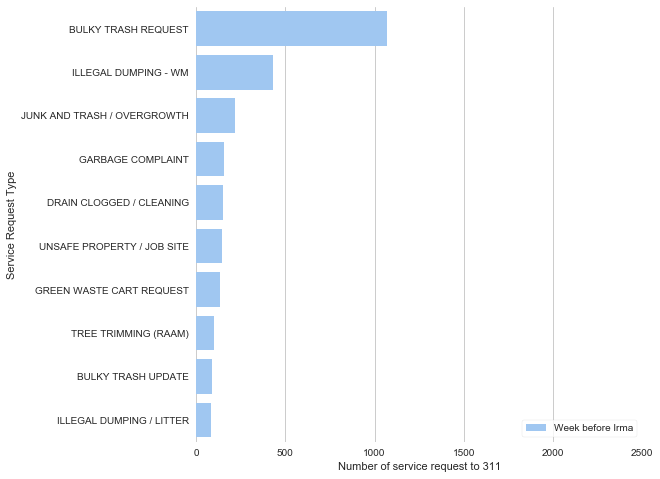

In [267]:
plt.show()